### Yield measurement of crop production (Crop Yield Prediction- CYP)   
#### To develop a model to predict the yield of a crop before cultivating into the agricultural field.

#### Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Import preprocessed data

In [2]:
crop_df = pd.read_csv('crop_yield.csv', index_col = 0)
rainfall_df = pd.read_csv('Rainfall.csv', index_col = 0)
temp_df = pd.read_csv('Temperature.csv', index_col = 0)

In [3]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season_ID
0,andaman and nicobar islands,nicobars,2000,Kharif,Arecanut,1254.0,2000.0,0
1,andaman and nicobar islands,nicobars,2000,Kharif,Other Kharif pulses,2.0,1.0,0
2,andaman and nicobar islands,nicobars,2000,Kharif,Rice,102.0,321.0,0
3,andaman and nicobar islands,nicobars,2000,whole_year,Banana,176.0,641.0,3
4,andaman and nicobar islands,nicobars,2000,whole_year,Cashewnut,720.0,165.0,3


In [4]:
rainfall_df.head()

,State_Name,District_Name,Crop_Year,Season,Rainfall
0,andhra pradesh,adilabad,1901,kharif,199.97725
1,andhra pradesh,adilabad,1902,kharif,156.64200
2,andhra pradesh,adilabad,1903,kharif,284.00250
3,andhra pradesh,adilabad,1904,kharif,151.13175
4,andhra pradesh,adilabad,1905,kharif,194.12500


In [5]:
temp_df.head()

,Crop_Year,Season,Temperature(M)
0,1901,kharif,26.4525
1,1902,kharif,26.1650
2,1903,kharif,26.3950
3,1904,kharif,25.9425
4,1905,kharif,26.8975


#### Merge the datasets based on the same columns

#### Merging crop data and rainfall data 

In [6]:
#Merging crop data and rainfall data based on'State_Name','District_Name','Crop_Year','Season' parameters
FCD_df = pd.merge(crop_df, rainfall_df, how='inner', left_on=['State_Name','District_Name','Crop_Year','Season'], right_on = ['State_Name','District_Name','Crop_Year', 'Season'])

In [7]:
FCD_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season_ID,Rainfall
0,andhra pradesh,anantapur,1998,whole_year,Sugarcane,700.0,65900.0,3,73.456083
1,andhra pradesh,anantapur,1998,whole_year,Tobacco,100.0,100.0,3,73.456083
2,andhra pradesh,anantapur,1999,whole_year,Dry chillies,5199.0,5759.0,3,53.643333
3,andhra pradesh,anantapur,1999,whole_year,Onion,1770.0,32364.0,3,53.643333
4,andhra pradesh,anantapur,1999,whole_year,Sugarcane,884.0,83126.0,3,53.643333


In [8]:
#Merging crop data and temperature data based on 'Crop_Year','Season' parameters
CP_df = pd.merge(FCD_df, temp_df, how='inner', left_on=['Crop_Year','Season'], right_on = ['Crop_Year','Season'])

#### Final dataframe 

In [9]:
CP_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season_ID,Rainfall,Temperature(M)
0,andhra pradesh,anantapur,1998,whole_year,Sugarcane,700.0,65900.0,3,73.456083,24.695
1,andhra pradesh,anantapur,1998,whole_year,Tobacco,100.0,100.0,3,73.456083,24.695
2,andhra pradesh,chittoor,1998,whole_year,Sugarcane,34500.0,3377000.0,3,81.818750,24.695
3,andhra pradesh,east godavari,1998,whole_year,Sugarcane,16400.0,1254900.0,3,97.433667,24.695
4,andhra pradesh,east godavari,1998,whole_year,Tobacco,7000.0,15900.0,3,97.433667,24.695


#### Viasualizing the data 

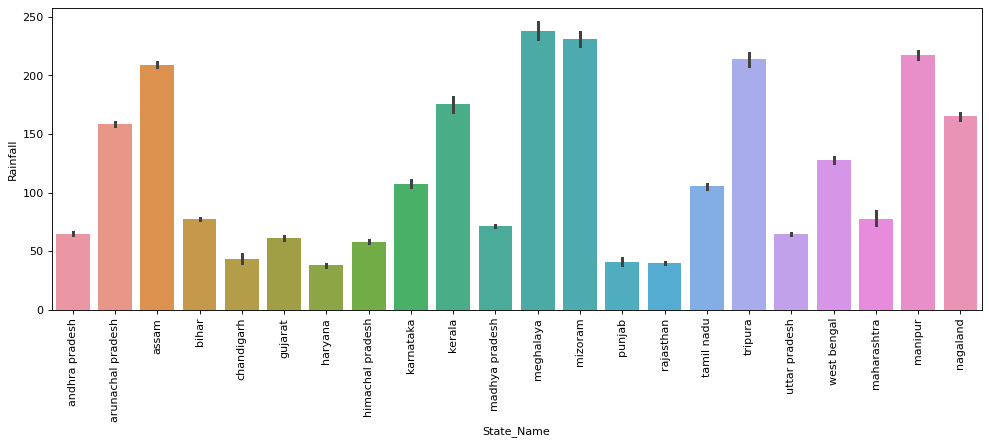

In [10]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = CP_df['State_Name'],
            y = CP_df['Rainfall'],
            data = CP_df)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# Show the plot
plt.show()

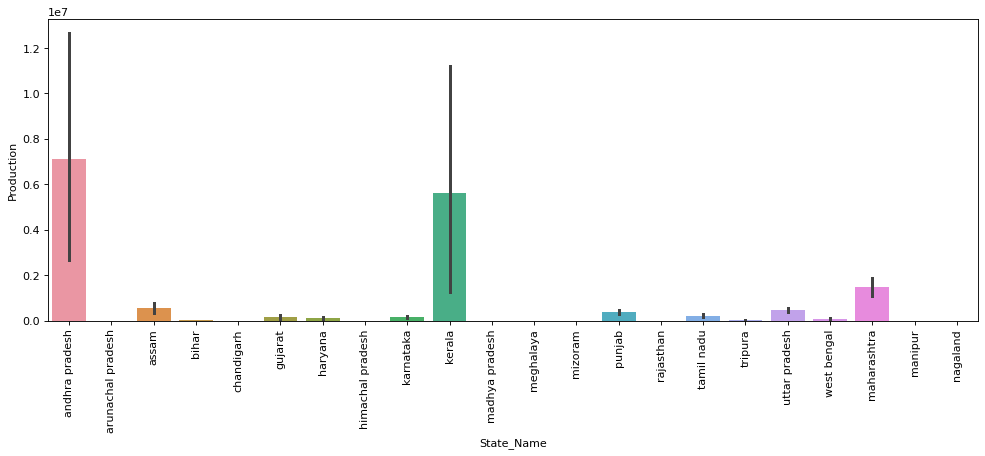

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = CP_df['State_Name'],
            y = CP_df['Production'],
            data = CP_df)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# Show the plot
plt.show()

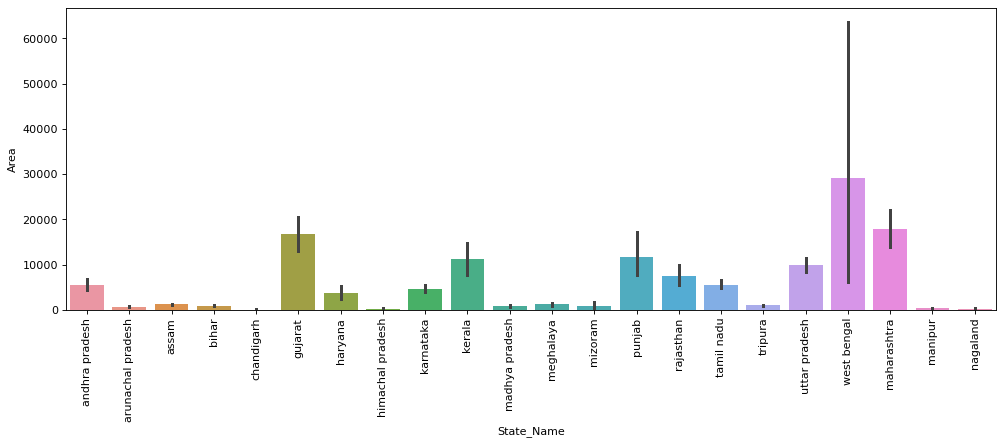

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = CP_df['State_Name'],
            y = CP_df['Area'],
            data = CP_df)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# Show the plot
plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Production'>

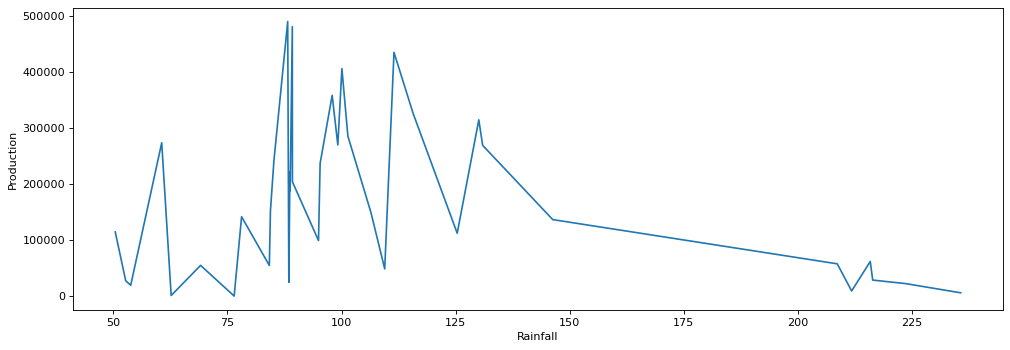

In [13]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
Rice_df = CP_df.query("Crop == 'Rice'")
sns.lineplot(data=Rice_df, x="Rainfall", y="Production")

<AxesSubplot:xlabel='Rainfall', ylabel='Temperature(M)'>

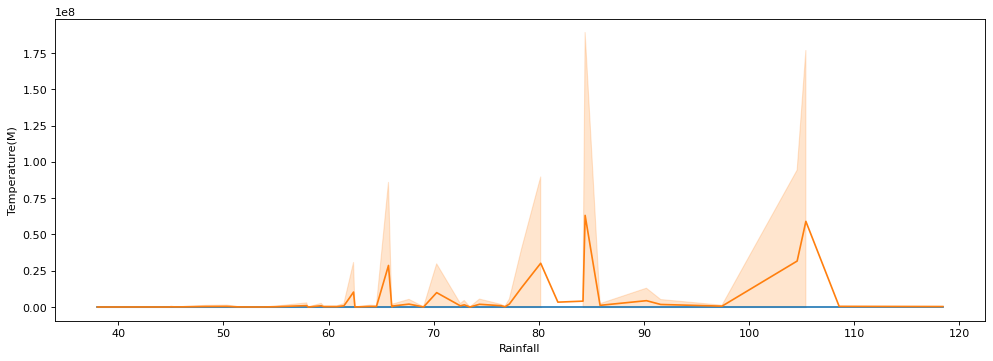

In [14]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
state_df = CP_df.query("State_Name == 'andhra pradesh'")
sns.lineplot(data=state_df, x="Rainfall", y="Temperature(M)")
sns.lineplot(data=state_df, x="Rainfall", y="Production")

#### Dependent and Independent Variable sepration

In [15]:
# Production/ yield of the crop depends on rainfall, temperature, area, crop, season
X = CP_df.iloc[:,[3,4,5,8,9]]
y = CP_df['Production']

In [16]:
X

,Season,Crop,Area,Rainfall,Temperature(M)
0,whole_year,Sugarcane,700.0,73.456083,24.695000
1,whole_year,Tobacco,100.0,73.456083,24.695000
2,whole_year,Sugarcane,34500.0,81.818750,24.695000
3,whole_year,Sugarcane,16400.0,97.433667,24.695000
4,whole_year,Tobacco,7000.0,97.433667,24.695000
...,...,...,...,...,...
14061,whole_year,Sannhamp,108.0,109.472917,24.254167
14062,whole_year,Sesamum,1037.0,109.472917,24.254167
14063,whole_year,Small millets,488.0,109.472917,24.254167
14064,whole_year,Sugarcane,500.0,109.472917,24.254167


#### Splitting the data into test and train 

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
se = LabelEncoder()
X['Season'] = se.fit_transform(X['Season'])
X['Crop'] = se.fit_transform(X['Crop'])

C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jaypr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#from sklearn.preprocessing import StandardScaler
# scaling data:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size=0.2)
print('Train set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Train set (11252, 5) (11252,)
Test set (2814, 5) (2814,)


#### Random Forest 

In [20]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=150)

In [21]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
RF_score = clf.score(X_test, y_test)

In [24]:
from sklearn import metrics

In [25]:
print('R^2:', metrics.r2_score(y_test, y_pred))

R^2: 0.35822084825800726


In [26]:
num=[]
for i in range(X_test.shape[0]):
    num.append(i+1)

Text(0, 0.5, 'Production')

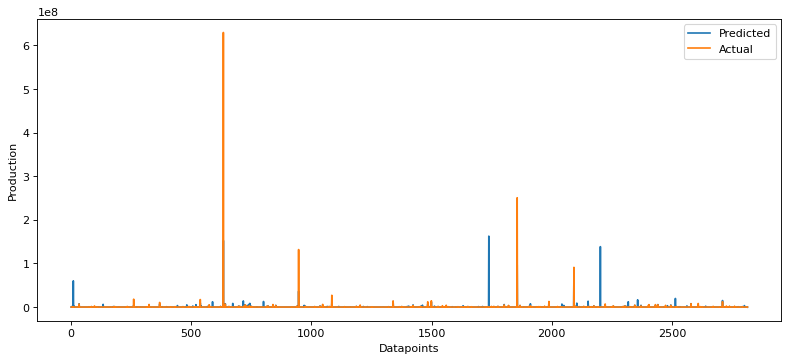

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

plt.plot(num,y_pred,label="Predicted")
plt.plot(num,y_test,label="Actual")
plt.legend()
plt.xlabel("Datapoints")
plt.ylabel("Production")

Text(0, 0.5, 'Production')

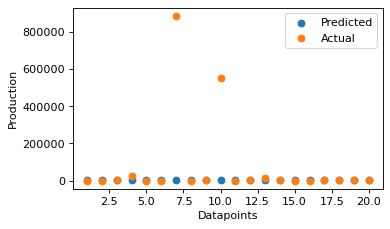

In [42]:
figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(num[:20],y_pred[:20],label="Predicted")
plt.scatter(num[:20],y_test[:20],label="Actual")
plt.legend()
plt.xlabel("Datapoints")
plt.ylabel("Production")

In [29]:
from sklearn.preprocessing import StandardScaler
# scaling data:
scaler = StandardScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.fit_transform(X_test)

In [30]:
#from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=110, random_state=0)

In [31]:
clf.fit(X_trainscaled, y_train)

RandomForestRegressor(n_estimators=110, random_state=0)

In [32]:
y_pred = clf.predict(X_testscaled)

In [33]:
RF_score_scaled = clf.score(X_testscaled, y_test)

#### SVM regression 

In [34]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
SVR_score = metrics.r2_score(y_test, y_pred)
print('R^2:', metrics.r2_score(y_test, y_pred))

R^2: -0.0017127955626341507


#### Linear Regression


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)
score_L=r2_score(y_test,pred_1)

In [38]:
score_L

0.0002263069923320593

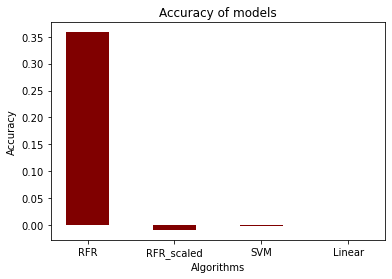

In [39]:
# creating the bar plot 
algo = ["RFR", "RFR_scaled", "SVM", "Linear"]
values = [RF_score, RF_score_scaled, SVR_score, score_L]
plt.bar(algo, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Accuracy") 
plt.title("Accuracy of models") 
plt.show() 